### TSNE

In [2]:
import os, sys
import numpy as np
import pandas as pd
def load_embeddings(file_path):
    """Load embeddings from a file if it exists."""
    if os.path.exists(file_path):
        print("Loading embeddings from file...")
        return np.load(file_path)
    else:
        print(f"File {file_path} not found.")
        sys.exit()

file_path = "../1_get_embedding_value/embeddings_pid_1.npy"
embeddings = load_embeddings(file_path)
df = pd.DataFrame(embeddings)

Loading embeddings from file...


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.006942,0.006319,0.011185,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462
1,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.006942,0.006319,0.011185,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462
2,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.006942,0.006319,0.011185,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462
3,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.006942,0.006319,0.011185,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462
4,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.006942,0.006319,0.011185,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45829,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.006942,0.006319,0.011185,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462
45830,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.006942,0.006319,0.011185,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462
45831,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.006942,0.006319,0.011185,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462
45832,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.006942,0.006319,0.011185,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462


In [4]:
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
from custom.io import load_nodes_jsonl

pid_num = 1
cache_dir = os.path.abspath('../../.save')
file_name = f"gpt-4o-batch-all-p_2_parser_ManuallyHierarchicalNodeParser_8165_gpu_V100_nodeNum_200_pid_{pid_num}.jsonl"
file_path = os.path.join(cache_dir, file_name)
nodes = load_nodes_jsonl(file_path)

Loading gpt-4o-batch-all-p_2_parser_ManuallyHierarchicalNodeParser_8165_gpu_V100_nodeNum_200_pid_1.jsonl: 100%|██████████| 1.33G/1.33G [00:33<00:00, 43.3MB/s]


In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
# We want to get TSNE embedding with 2 dimensions
n_components = 2
head_num = 45834
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(df.values[:head_num])
tsne_result.shape
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': [node.metadata['level'] for node in nodes[:head_num]]})

(45834, 2)

In [ ]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

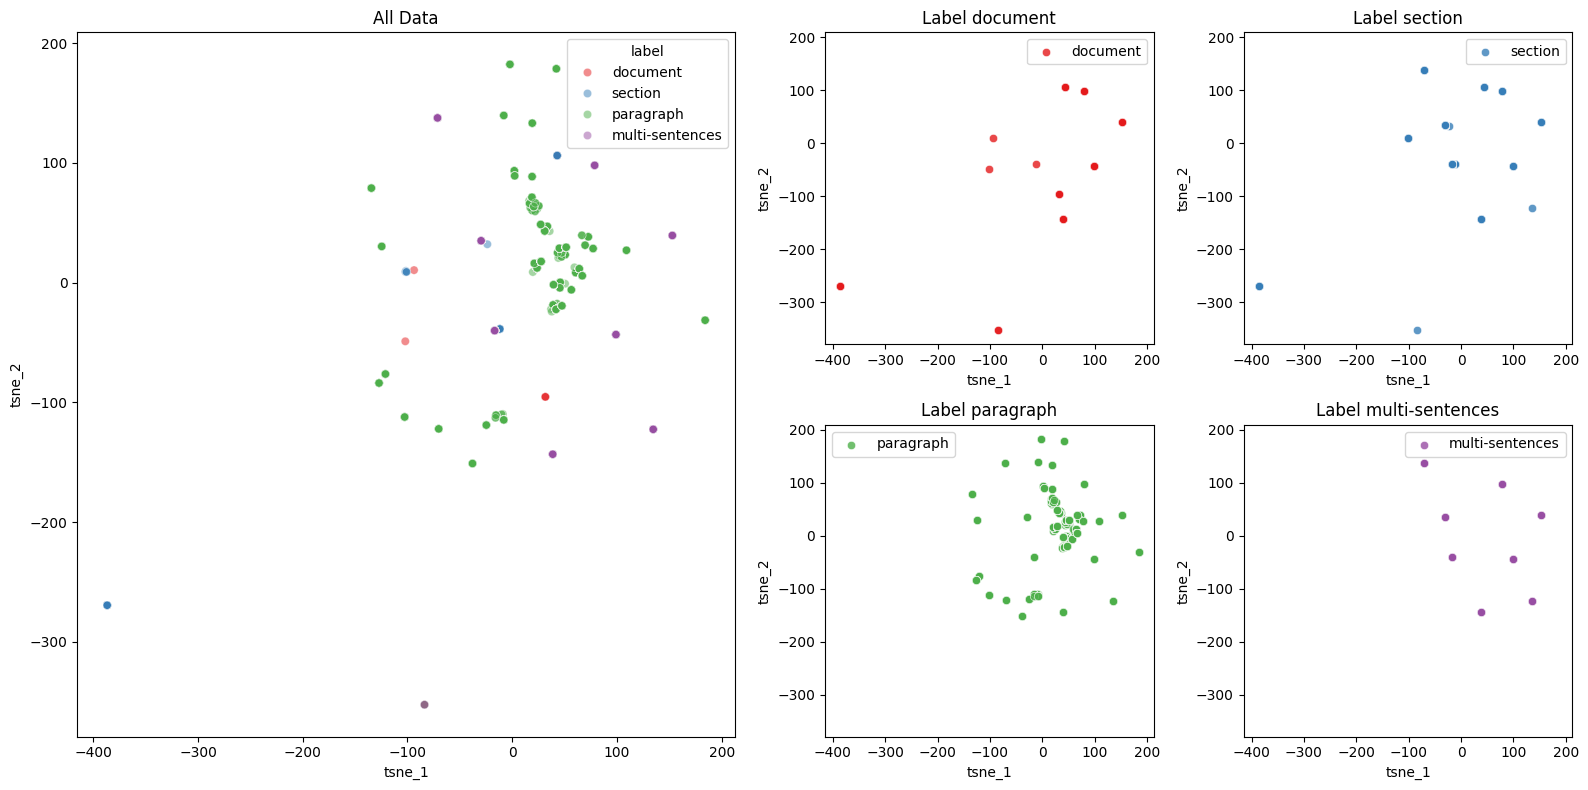

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.gridspec import GridSpec

# Assuming tsne_result_df is already defined
# tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': [node.metadata['level'] for node in nodes[:head_num]]})

# Define a consistent color palette
unique_labels = tsne_result_df['label'].unique()
palette = sns.color_palette('Set1', len(unique_labels))  # Adjust to match the number of labels

# Create a figure and a GridSpec layout
fig = plt.figure(figsize=(16, 8))  # Adjust the figure size
gs = GridSpec(2, 3, width_ratios=[2, 1, 1])  # Grid with 2 rows, 3 columns; larger space for the first plot

# Create the large plot on the left (spanning both rows)
ax_main = fig.add_subplot(gs[:, 0])  # This occupies all rows (both 2) in the first column
sns.scatterplot(data=tsne_result_df, x='tsne_1', y='tsne_2', hue='label', palette=palette, ax=ax_main, alpha=0.5)
ax_main.set_title('All Data')

# Get x and y axis limits from the main plot
xlim = ax_main.get_xlim()
ylim = ax_main.get_ylim()

# Create the 2x2 grid on the right for individual label plots
for i, label in enumerate(unique_labels[:4]):  # Assuming 4 labels
    ax = fig.add_subplot(gs[i//2, i%2 + 1])  # Place in the appropriate 2x2 grid
    label_data = tsne_result_df[tsne_result_df['label'] == label]
    sns.scatterplot(data=label_data, x='tsne_1', y='tsne_2', color=palette[i], ax=ax, alpha=0.8)
    
    # Set x and y limits to match the main plot
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    ax.set_title(f'Label {label}')
    ax.legend([label])

# Adjust layout
plt.tight_layout()
plt.show()

### Load data

In [24]:
import pandas as pd


In [25]:
# Load CSV file into DataFrame
df_pca = pd.read_hdf("cluster_result_pca.h5")

In [3]:
df_ae = pd.read_hdf("cluster_result_ae.h5")

In [30]:
df_kmeans = pd.read_hdf("cluster_result_kmeans.h5")

In [ ]:
import os, sys
sys.path.insert(0, os.path.abspath('.'))
from custom.io import load_nodes_jsonl

def load_nodes(pid_num, cache_dir):
    print("Loading nodes")
    file_name = f"gpt-4o-batch-all-p_2_parser_ManuallyHierarchicalNodeParser_8165_gpu_V100_nodeNum_200_pid_{pid_num}.jsonl"
    file_path = os.path.join(cache_dir, file_name)
    nodes = load_nodes_jsonl(file_path)
    return nodes

nodes = load_nodes(1, os.path.abspath('./.save'))

### PCA

In [ ]:
df_pca

In [ ]:
import os, sys
sys.path.insert(0, os.path.abspath('.'))
from custom.io import load_nodes_jsonl

def load_nodes(pid_num, cache_dir):
    print("Loading nodes")
    file_name = f"gpt-4o-batch-all-p_2_parser_ManuallyHierarchicalNodeParser_8165_gpu_V100_nodeNum_200_pid_{pid_num}.jsonl"
    file_path = os.path.join(cache_dir, file_name)
    nodes = load_nodes_jsonl(file_path)
    return nodes

nodes = load_nodes(1, os.path.abspath('./.save'))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_kmeans['kmean_labels'], cmap='viridis', s = 50, alpha=0.5) 

# Create the scatter plot
# level2int = {level : i for i, level in enumerate(['document', 'section', 'paragraph', 'multi-sentences'])}
# scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=[level2int[node.metadata['level']] for node in nodes], cmap='viridis', s = 50, alpha=0.5) 
# Reverse the mapping for easy label creation
# int2level = {v: k for k, v in level2int.items()}

# Set the ticks to match the integer labels for the levels
# cbar = plt.colorbar(scatter, label='labels')
# cbar.set_ticks([0, 1, 2, 3])
# cbar.set_ticklabels(['document', 'section', 'paragraph', 'multi-sentences'])

# Create a legend using custom patches
# handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(level2int[level])), label=level) 
#            for level in level2int]
unique_labels = np.unique(df_kmeans['kmean_labels'])
# handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(level2int[level])), label=level) 
#            for level in level2int]
handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(label)), label=f'Label {label}') for label in unique_labels]

# Add the legend to the plot (in the upper right corner)
plt.legend(handles=handles, title="Labels", loc='upper right')


# Add labels to the points
# for i, node in enumerate(nodes):
#     label = node.metadata['level']  # Get the text label
#     plt.text(df_pca['PCA1'].iloc[i], df_pca['PCA2'].iloc[i], label, fontsize=8, ha='right', color='black')

# Add titles and labels
plt.title('PCA of Clustered Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### t-SNE

In [ ]:
# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['TSNE1'], df['TSNE2'], c=df['dbscan_labels'], cmap='viridis', s=50)
plt.colorbar(scatter, label='dbscan_labels')

# Create a legend using custom patches
handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(level2int[level])), label=level) 
           for level in level2int]

# Add the legend to the plot (in the upper right corner)
plt.legend(handles=handles, title="Labels", loc='upper right')

plt.title('t-SNE of Clustered Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### AutoEncoder

In [ ]:
df_ae

In [21]:
selected_node = [node.metadata['level'] in ['document', 'section', 'paragraph', 'multi-sentences'] for node in nodes]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Plot the results
plt.figure(figsize=(10, 8))
# scatter = plt.scatter(df_ae['AE1'], df_ae['AE2'], c=df_kmeans['kmean_labels'], cmap='viridis', s=50)

# Create the scatter plot
level2int = {level : i for i, level in enumerate(['document', 'section', 'paragraph', 'multi-sentences'])}
scatter = plt.scatter(df_ae['AE1'][selected_node], df_ae['AE2'][selected_node], c=[level2int[node.metadata['level']] for i, node in enumerate(nodes) if selected_node[i]], cmap='viridis', s = 50, alpha=0.5) 
# Reverse the mapping for easy label creation
int2level = {v: k for k, v in level2int.items()}

# Create a legend using custom patches
handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(level2int[level])), label=level) 
           for level in level2int]

# Add the legend to the plot (in the upper right corner)
plt.legend(handles=handles, title="Labels", loc='upper right')

plt.title('AutoEncoder of Clustered Embeddings')
plt.xlabel('AutoEncoder Component 1')
plt.ylabel('AutoEncoder Component 2')
plt.show()

# Plot the results
plt.figure(figsize=(10, 8))
# scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_kmeans['kmean_labels'], cmap='viridis', s = 50, alpha=0.5) 


# Set the ticks to match the integer labels for the levels
# cbar = plt.colorbar(scatter, label='labels')
# cbar.set_ticks([0, 1, 2, 3])
# cbar.set_ticklabels(['document', 'section', 'paragraph', 'multi-sentences'])
